In [7]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.metrics import accuracy_score,classification_report

In [8]:
#importing datasets  
data_set= pd.read_csv('user_data.csv')  

In [9]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  

In [10]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [11]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [12]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [13]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [14]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred)  

C:\Users\User\AppData\Local\Temp\ipykernel_13728\1328020330.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


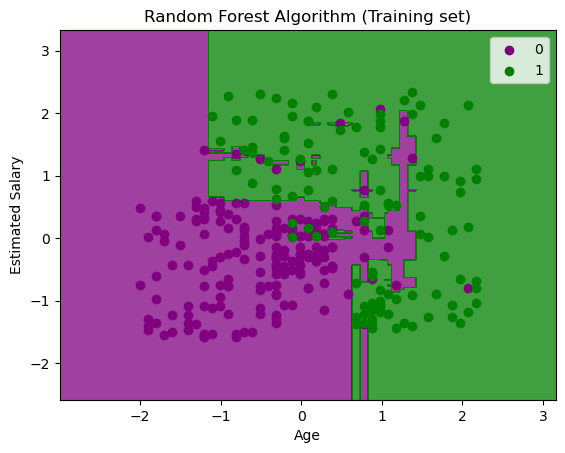

In [32]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
                     nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
                                        alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
# plt.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
#                                         alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Random Forest Algorithm (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

C:\Users\User\AppData\Local\Temp\ipykernel_13728\4019603534.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


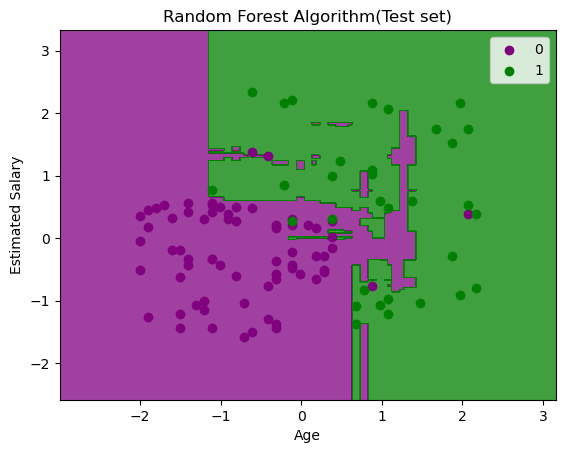

In [20]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
plt.title('Random Forest Algorithm(Test set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        68
           1       0.86      0.94      0.90        32

    accuracy                           0.93       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.93      0.93       100



Text(120.72222222222221, 0.5, 'Truth')

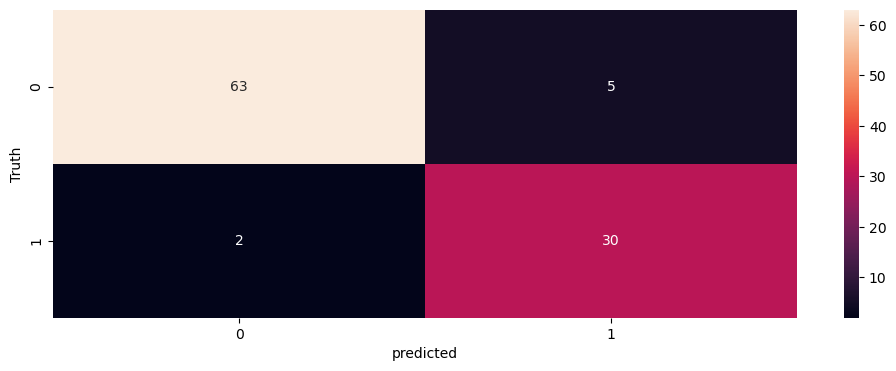

In [34]:
import seaborn as sn
plt.figure(figsize=(12,4))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

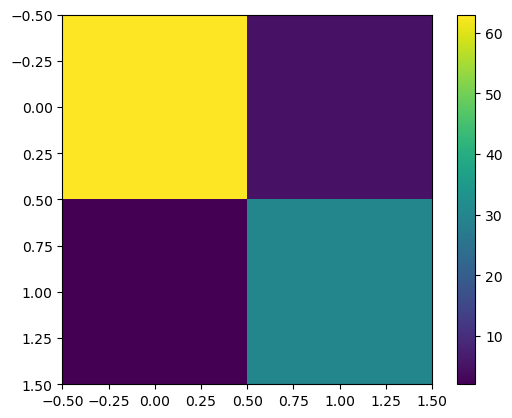

In [36]:
plt.imshow(cm)
plt.colorbar()